In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.read_csv('K-Means & Hirarchical Clustering/cities_r2.csv')
data.head()


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [2]:
print(data.isna().sum())

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64


In [3]:
# Step 2: Data Preprocessing
numeric_cols = data.select_dtypes(include='int64').columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [4]:
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [5]:
# Step 3: Data Transformation
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

In [6]:
# Step 4: Apply Hierarchical Clustering based on 'effective_literacy_rate_total'
x = data[['effective_literacy_rate_total']]
y = data['population_total']

x_scaled = StandardScaler().fit_transform(x)

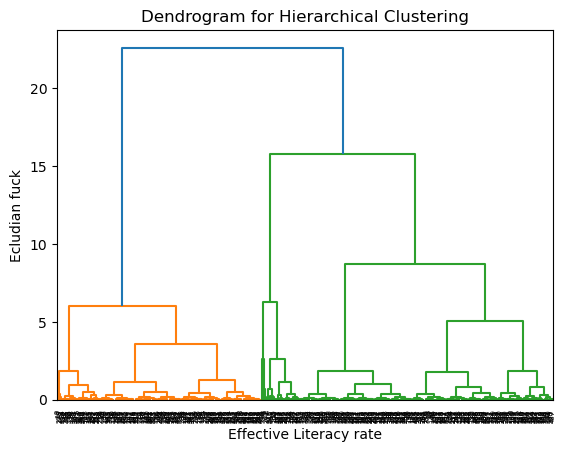

In [7]:
# Plot the dendrogram
dendrogram(linkage(x_scaled,method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Effective Literacy rate')
plt.ylabel('Ecludian fuck')
plt.show()

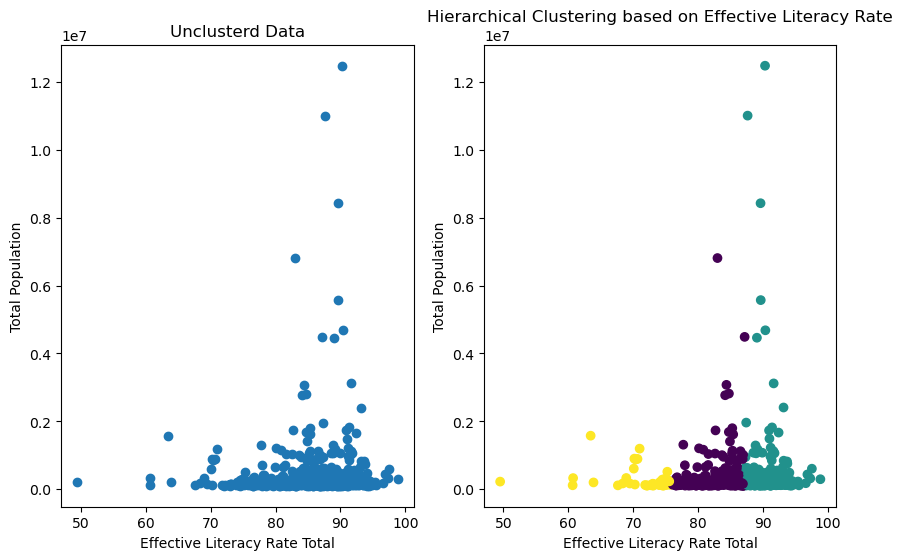

In [8]:
# Apply Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)
labels = hc.fit_predict(x_scaled)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(x,y)
plt.title('Unclusterd Data')
plt.xlabel('Effective Literacy Rate Total')
plt.ylabel('Total Population')


plt.subplot(1,2,2)
plt.scatter(x,y,c=labels)
plt.title('Hierarchical Clustering based on Effective Literacy Rate')
plt.xlabel('Effective Literacy Rate Total')
plt.ylabel('Total Population')

plt.show()
